In [6]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('data/T_HYROID (1).csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   S.no                       3221 non-null   int64  
 1   Age                        3221 non-null   int64  
 2   Sex                        3094 non-null   object 
 3   On Thyroxine               3221 non-null   object 
 4   Query on Thyroxine         3221 non-null   object 
 5   On Antithyroid Medication  3221 non-null   object 
 6   Sick                       3221 non-null   object 
 7   Pregnant                   3221 non-null   object 
 8   Thyroid Surgery            3221 non-null   object 
 9   I131 Treatment             3221 non-null   object 
 10  Query Hypothyroid          3221 non-null   object 
 11  Query Hyperthyroid         3221 non-null   object 
 12  Lithium                    3221 non-null   object 
 13  Goitre                     3221 non-null   objec

In [10]:
data.Category.unique()

array([2, 0, 1, 3], dtype=int64)

In [11]:
data.head(10)

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.30,t,2.5,t,125.0,t,1.14,t,109.0,2
1,1,23,F,f,f,f,f,f,f,f,...,4.10,t,2.0,t,102.0,f,0.97,f,106.0,2
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,1.9,t,109.0,t,0.91,t,120.0,2
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175.0,f,0.97,f,106.0,2
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61.0,t,0.87,t,70.0,2
5,5,18,F,t,f,f,f,f,f,f,...,0.03,f,1.9,t,183.0,t,1.30,t,141.0,2
6,6,59,F,f,f,f,f,f,f,f,...,1.50,f,1.9,t,72.0,t,0.92,t,78.0,2
7,7,80,F,f,f,f,f,f,f,f,...,2.20,t,0.6,t,80.0,t,0.70,t,115.0,2
8,8,66,F,f,f,f,f,f,f,f,...,0.60,t,2.2,t,123.0,t,0.93,t,132.0,2
9,9,68,M,f,f,f,f,f,f,f,...,2.40,t,1.6,t,83.0,t,0.89,t,93.0,2


In [12]:
data.columns


Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [13]:
# To check for the null values
data.isnull().sum()

S.no                           0
Age                            0
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                            0
T3 Measured                    0
T3                             0
TT4 Measured                   0
TT4                            0
T4U Measured                   0
T4U                            0
FTI Measured                   0
FTI                            0
Category                       0
dtype: int64

In [14]:
#Remove unwanted columns
data=data.drop([ 'S.no','On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
        'TSH Measured','Hypopituitary','Psych',
       'T3 Measured',  'TT4 Measured', 'T4U Measured', 
       'FTI Measured'],axis=1)

In [15]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [16]:
data['Sex'].unique()

array(['F', 'M', nan], dtype=object)

In [17]:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.533375,6.322330,1.951770,107.551630,0.988229,110.261347,1.936976
std,20.378207,26.543102,0.839899,38.091518,0.185982,35.967317,0.461636
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,0.000000
25%,37.000000,0.580000,1.600000,86.000000,0.880000,93.000000,2.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000,2.000000
75%,68.000000,3.000000,2.200000,123.000000,1.070000,123.000000,2.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,3.000000


In [18]:
data.shape

(3221, 13)

In [19]:
# replace ? with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [20]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

Age 0
Sex 0
Sick 0
Pregnant 0
Thyroid Surgery 0
Goitre 0
Tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Category 0


In [21]:
# Check for unique values
for column in data.columns:
    print(column,(data[column].unique()))

Age [ 41  23  46  70  18  59  80  66  68  84  67  71  28  65  42  63  51  81
  54  55  60  25  73  34  78  37  85  26  58  64  44  48  61  35  83  21
  87  53  77  27  69  74  38  76  45  36  22  43  72  82  31  39  49  62
  57   1  50  30  29  75  19   7  79  17  24  15  32  47  16  52  33  13
  10  89  56  20  90  40  88  14  86  94  12   4  11   8   5 455   2  91
   6  93  92]
Sex ['F' 'M' nan]
Sick ['f' 't']
Pregnant ['f' 't']
Thyroid Surgery ['f' 't']
Goitre ['f' 't']
Tumor ['f' 't']
TSH [1.30e+00 4.10e+00 9.80e-01 1.60e-01 7.20e-01 3.00e-02 1.50e+00 2.20e+00
 6.00e-01 2.40e+00 1.10e+00 2.80e+00 3.30e+00 1.20e+01 1.20e+00 6.00e+00
 2.10e+00 1.00e-01 8.00e-01 1.90e+00 3.10e+00 2.00e-01 1.30e+01 3.00e-01
 3.50e-02 2.50e+00 5.00e-01 1.70e+00 7.30e+00 1.80e+00 2.60e-01 4.50e+01
 5.40e+00 9.90e-01 2.50e-01 9.20e-01 1.50e-01 6.40e-01 1.00e+00 4.00e-01
 2.00e+00 2.60e+00 1.48e+01 1.50e+01 1.90e+01 2.00e-02 3.00e+00 2.90e+00
 3.20e+00 9.00e+00 1.60e+00 4.30e+00 5.00e-03 3.10e-01 6.10e-01 

In [22]:
# handling missing values
data['Age'].fillna((data['Age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)
data['Sex'].fillna((data['Sex'].mode()), inplace=True)

In [23]:
data.columns

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'],
      dtype='object')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3221 non-null   int64  
 1   Sex              3094 non-null   object 
 2   Sick             3221 non-null   object 
 3   Pregnant         3221 non-null   object 
 4   Thyroid Surgery  3221 non-null   object 
 5   Goitre           3221 non-null   object 
 6   Tumor            3221 non-null   object 
 7   TSH              3221 non-null   float64
 8   T3               3221 non-null   float64
 9   TT4              3221 non-null   float64
 10  T4U              3221 non-null   float64
 11  FTI              3221 non-null   float64
 12  Category         3221 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 327.3+ KB


In [25]:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.533375,6.322330,1.951770,107.551630,0.988229,110.261347,1.936976
std,20.378207,26.543102,0.839899,38.091518,0.185982,35.967317,0.461636
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,0.000000
25%,37.000000,0.580000,1.600000,86.000000,0.880000,93.000000,2.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000,2.000000
75%,68.000000,3.000000,2.200000,123.000000,1.070000,123.000000,2.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,3.000000


In [26]:
## segregate numerical and categorical columns

numerical_columns=data.columns[data.dtypes!='object']
categorical_columns=data.columns[data.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Category'], dtype='object')
Categorical Columns: Index(['Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor'], dtype='object')


In [27]:
data[categorical_columns].describe()

,Sex,Sick,Pregnant,Thyroid Surgery,Goitre,Tumor
count,3094,3221,3221,3221,3221,3221
unique,2,2,2,2,2,2
top,F,f,f,f,f,f
freq,2108,3080,3175,3180,3194,3130


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3221 non-null   int64  
 1   Sex              3094 non-null   object 
 2   Sick             3221 non-null   object 
 3   Pregnant         3221 non-null   object 
 4   Thyroid Surgery  3221 non-null   object 
 5   Goitre           3221 non-null   object 
 6   Tumor            3221 non-null   object 
 7   TSH              3221 non-null   float64
 8   T3               3221 non-null   float64
 9   TT4              3221 non-null   float64
 10  T4U              3221 non-null   float64
 11  FTI              3221 non-null   float64
 12  Category         3221 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 327.3+ KB


In [30]:
import os
print(os.environ['PATH'])
!export PATH=/Library/TeX/texbin:$PATH

c:\THYROID_PREDICTION\venv;c:\THYROID_PREDICTION\venv\Library\mingw-w64\bin;c:\THYROID_PREDICTION\venv\Library\usr\bin;c:\THYROID_PREDICTION\venv\Library\bin;c:\THYROID_PREDICTION\venv\Scripts;c:\THYROID_PREDICTION\venv\bin;C:\Users\ASUS\anaconda3\condabin;C:\Program Files\Python312\Scripts;C:\Program Files\Python312;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\Users\ASUS\anaconda3;C:\Users\ASUS\anaconda3\Library\mingw-w64\bin;C:\Users\ASUS\anaconda3\Library\usr\bin;C:\Users\ASUS\anaconda3\Library\bin;C:\Users\ASUS\anaconda3\Scripts;C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps;C:\Users\ASUS\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\ASUS\AppData\Local\GitHubDesktop\bin


'export' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5668\1314556968.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5668\1314556968.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_566

ValueError: num must be an integer with 1 <= num <= 6, not 7

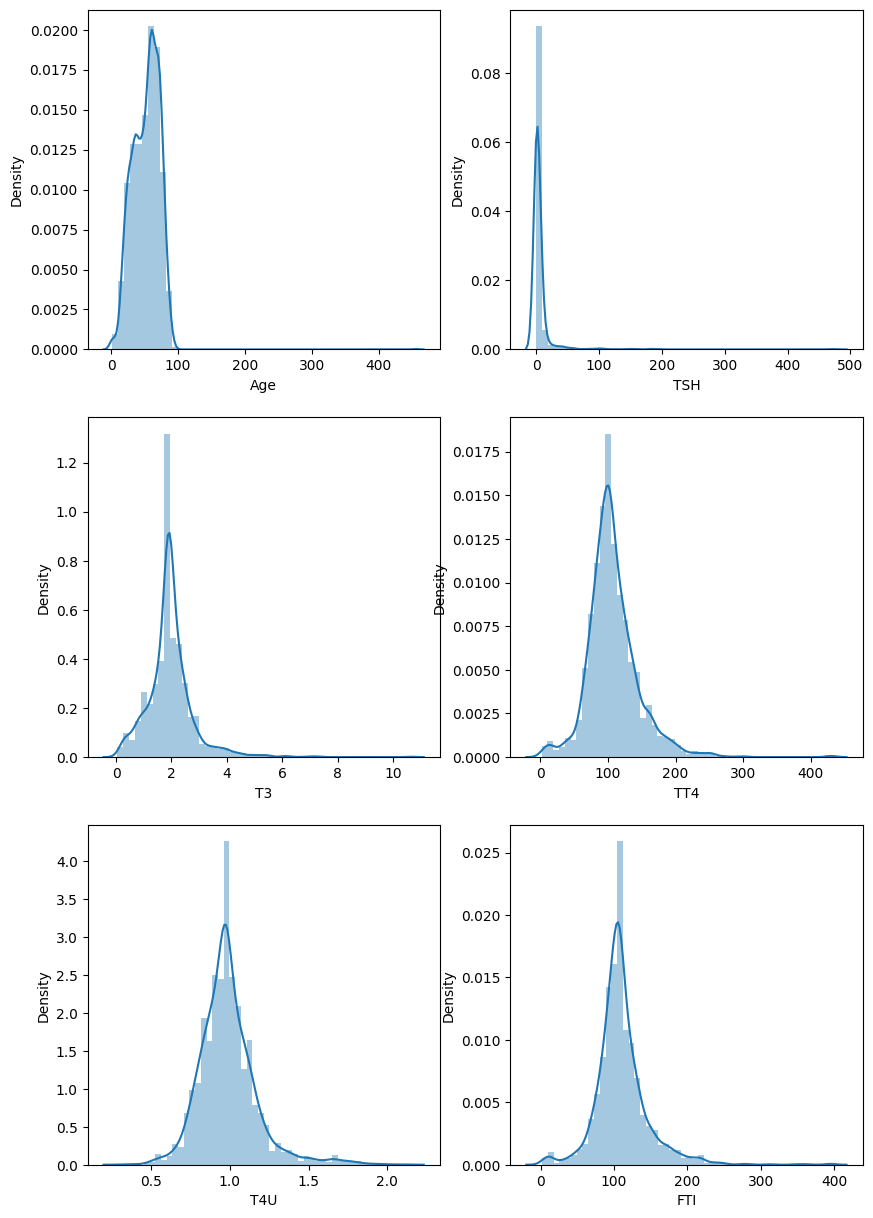

In [32]:
columns = numerical_columns

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

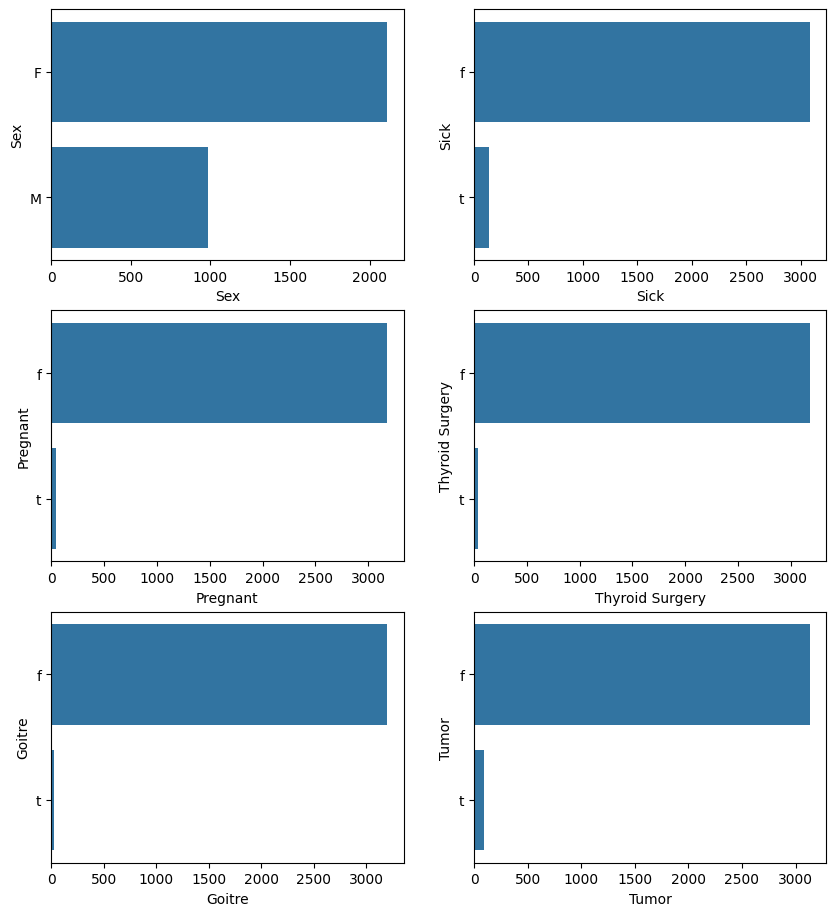

In [33]:
columns = categorical_columns

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(4,2,plotnumber)
    sns.countplot(data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [34]:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI,Category
count,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,52.533375,6.322330,1.951770,107.551630,0.988229,110.261347,1.936976
std,20.378207,26.543102,0.839899,38.091518,0.185982,35.967317,0.461636
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000,0.000000
25%,37.000000,0.580000,1.600000,86.000000,0.880000,93.000000,2.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000,2.000000
75%,68.000000,3.000000,2.200000,123.000000,1.070000,123.000000,2.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000,3.000000


In [36]:
# the graph TSH is heavily skewed towards left . so we drop it
data=data.drop(['TSH'], axis=1)

In [37]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
data['Category']=lblEn.fit_transform(data['Category'])

<Axes: xlabel='Category', ylabel='Count'>

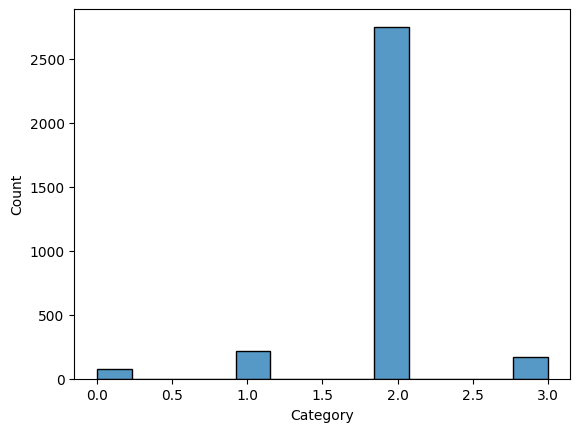

In [38]:
sns.histplot(x='Category',data=data)

In [123]:
# data set is highly imbalanced

In [39]:
X=data.drop(['Category'],axis=1)
y=data.Category

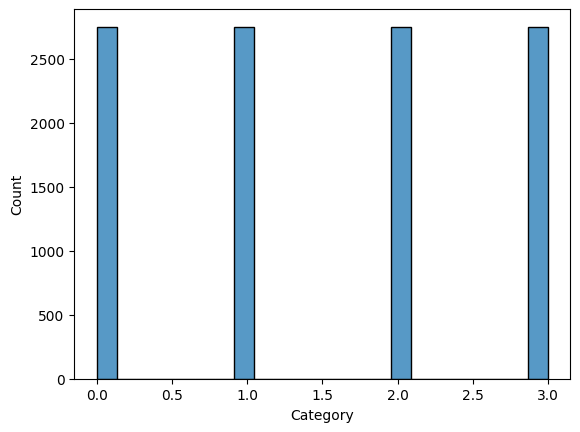

Index(['Age', 'Sex', 'Sick', 'Pregnant', 'Thyroid Surgery', 'Goitre', 'Tumor',
       'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [40]:
# To balance the dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE


rdsmple=RandomOverSampler()
X_sampled,y_sampled=rdsmple.fit_resample(X,y)

X_sampled.shape


X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)
X_sampled



sns.histplot(y_sampled)



plt.show()

X_sampled.columns



In [126]:
#Now the data is balanced

In [41]:
y_sampled.unique()

array([2, 0, 1, 3], dtype=int64)

In [42]:
import os
print(os.environ['PATH'])

c:\THYROID_PREDICTION\venv;c:\THYROID_PREDICTION\venv\Library\mingw-w64\bin;c:\THYROID_PREDICTION\venv\Library\usr\bin;c:\THYROID_PREDICTION\venv\Library\bin;c:\THYROID_PREDICTION\venv\Scripts;c:\THYROID_PREDICTION\venv\bin;C:\Users\ASUS\anaconda3\condabin;C:\Program Files\Python312\Scripts;C:\Program Files\Python312;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\Git\cmd;C:\Users\ASUS\anaconda3;C:\Users\ASUS\anaconda3\Library\mingw-w64\bin;C:\Users\ASUS\anaconda3\Library\usr\bin;C:\Users\ASUS\anaconda3\Library\bin;C:\Users\ASUS\anaconda3\Scripts;C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps;C:\Users\ASUS\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\ASUS\AppData\Local\GitHubDesktop\bin


In [43]:

!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3221 non-null   int64  
 1   Sex              3094 non-null   object 
 2   Sick             3221 non-null   object 
 3   Pregnant         3221 non-null   object 
 4   Thyroid Surgery  3221 non-null   object 
 5   Goitre           3221 non-null   object 
 6   Tumor            3221 non-null   object 
 7   T3               3221 non-null   float64
 8   TT4              3221 non-null   float64
 9   T4U              3221 non-null   float64
 10  FTI              3221 non-null   float64
 11  Category         3221 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 302.1+ KB
